# Unsupervised Learning - Clustering
Visualization of the data clustering and the dimension reduction, from the dataset containing pixels whose intensity vary over the 48 000 images (saved in train_changing_pixels_df.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.sparse import csr_matrix

In [2]:
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [3]:
#Loading datasets
train_changing_pixels_df = pd.read_csv('train_changing_pixels_DB.csv', index_col=0)
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')
#print(train_changing_pixels_df.head())
#print(train_simplified_pixels_df.head())
#print(train.head())

#Pixels with constant intensities that have been dropped in the train_changing_pixels_df
DROPPED_PIX = ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 
               'pixel10', 'pixel11', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 
               'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 
               'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84', 
               'pixel85', 'pixel111', 'pixel112', 'pixel139', 'pixel140', 'pixel141', 'pixel168', 'pixel196', 
               'pixel392', 'pixel420', 'pixel421', 'pixel448', 'pixel476', 'pixel532', 'pixel560', 'pixel644', 
               'pixel645', 'pixel671', 'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727', 
               'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel754', 'pixel755', 'pixel756', 'pixel757', 
               'pixel758', 'pixel759', 'pixel760', 'pixel780', 'pixel781', 'pixel782', 'pixel783']

## Clustering visualizations

In [ ]:
#Preparing samples and labels arrays
s = np.random.randint(low=0, high=42001, size=8200).tolist()
samples = train_changing_pixels_df.iloc[s, :].values
digits = train.iloc[s, :]['label'].tolist()
print(samples.shape)

#Dendrogram of the clustering of data
mergings = linkage(samples, method='complete')
_ = plt.figure(figsize=(30,20))
_ = dendrogram(mergings, labels=digits)
_ = plt.title('Dendrogram of the sampled changing pixels (not scaled/normalized)')
_ = plt.legend(digits)
_ = plt.savefig('visualizations/Dendrogram.png')
plt.show()

In [ ]:
#Preparing samples and labels arrays
s = np.random.randint(low=0, high=42001, size=8400).tolist()
samples = train_changing_pixels_df.iloc[s, :].values
digits = train.iloc[s, :]['label'].tolist()
print(samples.shape)

#t-SNE visualization of the data
model = TSNE(learning_rate=100)  #between 50-200
transformed = model.fit_transform(samples)
xs = transformed[:, 0]
ys = transformed[:, 1]
_ = plt.figure(figsize=(30,20))
_ = plt.scatter(xs, ys, c=digits, alpha=0.6, cmap = "nipy_spectral")
_ = plt.title('t-SNE of the sampled changing pixels (not scaled/normalized)')
_ = plt.legend(digits)
_ = plt.savefig('visualizations/t-SNE.png')
plt.show()

*For a sample of 8200 images (20% of the train set), the t-SNE displays 9 clusters, for the 10 digits of the dataset, that are clear. However, there are 2x2 digits that look harder to dissociate from each other.*

*For a sample of half the data (21 000 images) the cluster are clearer with still 2 of them that have a common area.*

## Dimension Reduction
### Principal Components Analysis (PCA)

In [ ]:
#Preparing samples and labels arrays
#s = np.random.randint(low=0, high=42001, size=1050).tolist()
samples = train_changing_pixels_df.values  #.iloc[s, :]
digits = train['label'].tolist()  #.iloc[s, :]
print(samples.shape)

In [1]:
#PCA model
pca = PCA()
pca.fit(samples)

#PCA features variance visualization
pca_features = range(pca.n_components_)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(pca_features, pca.explained_variance_)
_ = plt.xticks(pca_features)
_ = plt.title('Principal Components Analysis for Dimension Reduction')
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
_ = plt.savefig('visualizations/PCA features variance.png')
plt.show()

#PCA features variance visualization - ZOOM in
l= 100
x = range(l)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(x, pca.explained_variance_[:l])
_ = plt.xticks(x)
_ = plt.title('Principal Components Analysis for Dimension Reduction - Zoom In {} first features'.format(l))
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
_ = plt.savefig('visualizations/PCA features variance_zoom.png')
plt.show()

NameError: name 'PCA' is not defined

*The best number of PCA features to keep (reduced dimension) is <80. The 1st PCA feature represents a lot of the variance, as the 5 following ones.*

In [ ]:
#Visualization of the variance of the data carried by the number of PCA features
n_components = np.array([1,2,3,4,5,6, 10, 30, 60, 80, 100, 200, 400, 700])
cumul_variance = np.empty(len(n_components))
for i, n in enumerate(n_components):
    pca = PCA(n_components=n)
    pca.fit(samples)
    cumul_variance[i] = np.sum(pca.explained_variance_ratio_)

print(cumul_variance)

_ = plt.figure(figsize=(30,20))
_ = plt.grid(which='both')
_ = plt.plot(n_components, cumul_variance, color='red')
_ = plt.xscale('log')
_ = plt.xlabel('Number of PCA features', size=20)
_ = plt.ylabel('Cumulated variance of data (%)', size=20)
_ = plt.title('Data variance cumulated vs number of PCA features', size=20)
plt.savefig('visualizations/cumulated variance_pca features.png')
plt.show()

*50% of the data variance is carried by 10 PCA features, and 90% of the data variance is carried by 80 PCA features (vs 708 features initially). The reduction is huge !*

*However, the PCE features have no interpretable meaning.*

*--> The use of PCA() in the pipleine along with StandardScaler() and SVC() increased the accuracy up to 0.97 trained on half of the samples.*

### Non-negative Matrix Factorization (NMF)

In [57]:
#Preparing samples and labels arrays
s = np.random.randint(low=0, high=42001, size=8200).tolist()
samples = train.drop(columns='label').values  #.iloc[s, :]
digitsa = train['label'].tolist()  #.iloc[s, :]
print(samples.shape)

(42000, 784)


Shape of NMF features: (42000, 16), shape of NMF components: (16, 784)


C:\Users\Damien\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


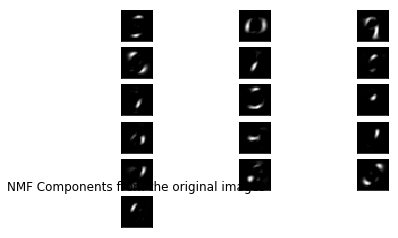

In [58]:
#Creating the NMF model and the features & components
nmf = NMF(n_components=16)
nmf_features = nmf.fit_transform(samples)
nmf_components = nmf.components_
print("Shape of NMF features: {}, shape of NMF components: {}".format(nmf_features.shape, nmf_components.shape))

#Visualization of the features
for i, component in enumerate(nmf_components):
    N = nmf_components.shape[0]
    ax = plt.subplot((N//3)+1, 3, i+1)
    bitmap = component.reshape((28,28))
    plt.imshow(bitmap, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.title('NMF Components from the original images')
plt.show()

*The samples have been split between NMF features and components, in a way that Features x Components = Samples (with matrices product)*

*The images have been decomposed into combinations of the NMF components displaed above.*

In [ ]:
%%time

#Sample randomly the dataset using discrete_uniform pick-up to reduce the amount of data
#sample = np.random.randint(low=0, high=42001, size=8400).tolist()
X = train_changing_pixels_df.values  #.iloc[sample, :]
X = X / 255.0
y = train['label'].values  #.iloc[sample, :]
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4, stratify=y)

#Yielding the scores according to number of NMF components
components = np.arange(1, 100)
scores = np.empty(len(components))
for n in components:
    pipeline = make_pipeline(NMF(n_components=n), SVC(kernel='rbf', cache_size=1000))
    pipeline.fit(X_train, y_train)
    scores[n-1] = pipeline.score(X_test, y_test)

#Plotting of the scores evlution
_ = plt.figure(figsize=(30,20))
_ = plt.grid(which='both')
_ = plt.plot(components, scores)
_ = plt.xlabel('Number of NMF components', size=20)
_ = plt.ylabel('Score obtained', size=20)
_ = plt.title('Evolution of SVC classification score (samples={})'.format(len(y)), 
              size=30)
plt.savefig('visualizations/Score vs components NMF.png')
plt.show()

print("Best score {} obtained for {} components".format(scores.max(), scores.argmax()+1))

*Highest score of 0.83 obtained for 16 components*

### Sparce matrix
As the pixel inteisties present a lot of 0 values, we can turn the train 2D array into a sparse matrix to reduce the memory size

https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
- TruncatedSVD for the equivalent of PCA()
- NMF() directly with the csr_matrix

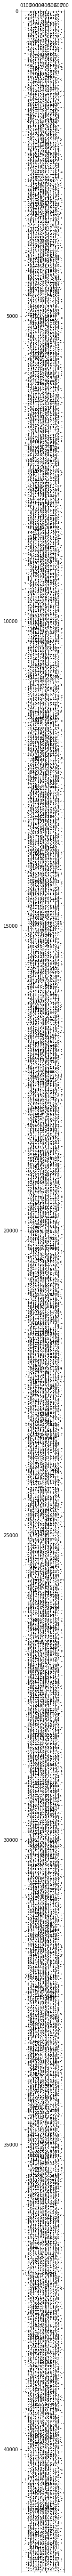

From 237.888 to 75.84826 Mo in memory usage with the sparse matrix
(42000, 10)


In [4]:
#Sparsity visuaization & sparse matrix creation
samples = train_changing_pixels_df.values
_ = plt.figure(figsize=(10,100))
_ = plt.spy(samples)
plt.show()

sparse_samples = csr_matrix(samples)

#Memory Size comparison
dense_size = samples.nbytes/1e6
sparse_size = (sparse_samples.data.nbytes + 
               sparse_samples.indptr.nbytes + sparse_samples.indices.nbytes)/1e6
print("From {} to {} Mo in memory usage with the sparse matrix".format(dense_size, sparse_size))

#Dimension reduction using PCA equivalent for sparse matrix
model = TruncatedSVD(n_components=10)
model.fit(sparse_samples)
reduced_sparse_samples = model.transform(sparse_samples)
print(reduced_sparse_samples.shape)

*The sparsity visualization confirms the relevance of the use of a csr matrix for the samples*

---

## Clustering models
### with PCA dimension reduction

In [ ]:
#Preparing samples and labels arrays
#s = np.random.randint(low=0, high=42001, size=42000).tolist()
samples = train_changing_pixels_df.values  #.iloc[s, :]
digits = train['label'].tolist()  #.iloc[s, :]
print("Shape of samples: {}".format(samples.shape))

In [ ]:
%%time

#K-Means clustering
pipeline = make_pipeline((StandardScaler()),
                         PCA(n_components=80),    
                         KMeans(n_clusters=10))  #10 digits to identify
pipeline.fit(samples)
labels = pipeline.predict(samples)

#Predictions on holdout set
X_holdout = holdout.drop(columns=DROPPED_PIX).values
predictions = pipeline.predict(X_holdout)  #/!!\ predicted labels don't correspond to digits !

#Cross-tabulation
df = pd.DataFrame({'clusters_labels': labels, 'digits': digits })
cross_tab= pd.crosstab(df['clusters_labels'], df['digits'])
print(cross_tab)

#cluster-digits matching dict
cluster_digit_dict = {}
for i, row in cross_tab.iterrows():
    cluster_digit_dict[i] = row.idxmax()
print(cluster_digit_dict)

#Submission form
submission_df = pd.DataFrame({'ImageId': range(1,28001), 'cluster_label': predictions})
submission_df['Label'] = submission_df['cluster_label'].map(cluster_digit_dict)
submission_df.drop(columns=['cluster_label'], inplace=True)
#submission_df.to_csv('submission_pca_kmeans_DB.csv', index=False)

*Digits 1, 4, 5 and 7 are harder to classify as they are represented in several clusters closely*

### with NMF dimension reduction
/!\ NMF doesn't accept negative values -> StandardScaler() not possible here 

In [15]:
#Preparing samples and labels arrays
#s = np.random.randint(low=0, high=42001, size=42000).tolist()
samples = train_changing_pixels_df.values  #.iloc[s, :]
digits = train['label'].tolist()  #.iloc[s, :]
print("Shape of samples: {}".format(samples.shape))

Shape of samples: (42000, 708)


In [17]:
%%time

#K-Means clustering
pipeline = make_pipeline(MaxAbsScaler(), 
                         NMF(n_components=18),
                         KMeans(n_clusters=10))  #10 digits to identify

pipeline.fit(samples)
labels = pipeline.predict(samples)

#Predictions on holdout set
X_holdout = holdout.drop(columns=DROPPED_PIX).values
predictions = pipeline.predict(X_holdout)  #/!!\ predicted labels correspond to clusters !

#Cross-tabulation
df = pd.DataFrame({'clusters_labels': labels, 'digits': digits })
cross_tab= pd.crosstab(df['clusters_labels'], df['digits'])
print(cross_tab)

#cluster-digits matching dict
cluster_digit_dict = {}
for i, row in cross_tab.iterrows():
    cluster_digit_dict[i] = row.idxmax()
print(cluster_digit_dict)

#Submission form
submission_df = pd.DataFrame({'ImageId': range(1,28001), 'cluster_label': predictions})
submission_df['Label'] = submission_df['cluster_label'].map(cluster_digit_dict)
submission_df.drop(columns=['cluster_label'], inplace=True)
#submission_df.to_csv('submission_pca_kmeans_DB.csv', index=False)

digits              0     1     2     3     4     5     6     7     8     9
clusters_labels                                                            
0                   1     2    61    95  1172   125     0  1843   163  1503
1                   0  3437   293    32    77   138    72   194   400    27
2                 224     0   297    15   549    44  1063    51    32   127
3                1000    21   192   178   107   492  2143     0   182    17
4                2439     0     8     6     1    22    50     8    13    17
5                  32    16  2743   274   121    39   568    24    75    13
6                 105     5   216  2168    24   698    40     2   434    31
7                 291     5   151  1170    13  1054    48     3  2015   142
8                  29  1192   114   358  1285  1072   138   524   436  1272
9                  11     6   102    55   723   111    15  1752   313  1039
{0: 7, 1: 1, 2: 6, 3: 6, 4: 0, 5: 2, 6: 3, 7: 8, 8: 4, 9: 7}
Wall time: 3min 20s


## Cosine Similarity
https://towardsdatascience.com/building-improving-a-k-nearest-neighbors-algorithm-in-python-3b6b5320d2f8